In [12]:
import Ouzo_Sampling_Wtf_Lattice_Volume as create
import OT2_Ouzo_Commands as ot2_commands
import Ouzo_Graph_Tools as ouzo_graphs
from opentrons import simulate, execute, protocol_api
import pandas as pd
import numpy as np

In [13]:
experiment_dict = create.get_experiment_plan(r"C:\Users\Edwin\Desktop\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Testing Plans\Testing_Example.csv")
wtf_sample_canidates = create.generate_candidate_lattice_concentrations(experiment_dict, filter_one=True)
stock_canidates = create.generate_candidate_lattice_stocks(experiment_dict) # just make it one step

In [22]:
# JUST MOVE INTO GRPAHING MODULE 
def graph_stock_canidates(stock_canidates, experiment_dict, wtf_sample_canidates):    
    stock_names = experiment_dict['Stock Names']
    stock_units = experiment_dict['Stock Concentration Units']
    
    
    filtered_wtf_rearranged_list = []
    stock_text_list = []
    for stock_canidate in stock_canidates:
        volume_canidates = create.calculate_ouzo_volumes(wtf_sample_canidates, experiment_dict, searching=True, searching_stock_concentrations=stock_canidate)
        filtered_wtf_samples, filtered_volume_samples = create.filter_samples(wtf_sample_canidates, volume_canidates, 30, 1000)
        filtered_wtf_samples_rearranged = filtered_wtf_samples
        filtered_wtf_rearranged_list.append(filtered_wtf_samples_rearranged)
        
        stock_text = ['', 'Stock Information']
        
        for i, stock_name in enumerate(stock_names):
            additional_stock_text = stock_name + ' ' + str(stock_canidate[i]) + ' ' + stock_units[i]
            stock_text.append(additional_stock_text) 
        stock_text_list.append(stock_text)
    print(filtered_wtf_rearranged_list)
    for i, stock_canidate_samples in enumerate(filtered_wtf_rearranged_list):
        ouzo_graphs.graph_canidates(experiment_dict, wtf_sample_canidates, stock_canidate_samples, additional_text = stock_text_list[i])

Min sample volume = 736.6685525253895uL Max sample volume = 736.6804371948689uL
Min sample volume = 736.5588478840391uL Max sample volume = 736.680437194869uL
Min sample volume = 736.6013584325623uL Max sample volume = 736.6438689810856uL
Min sample volume = 736.3878914846017uL Max sample volume = 736.6438689810856uL
Min sample volume = 736.5282220049955uL Max sample volume = 736.6073007673021uL
Min sample volume = 736.3334962665989uL Max sample volume = 736.6073007673021uL
[[array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.00000000e-04, 6.05555556e-05, 7.50000000e-05, 4.00000000e-01,
       5.99764444e-01]), array([1.00000000e-04, 6.77777778e-05, 7.50000000e-05, 4.00000000e-01,
       5.99757222e-01])], [array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.44444444e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99727222e-01]), array([1.88888889e-04, 5.33333333e-05

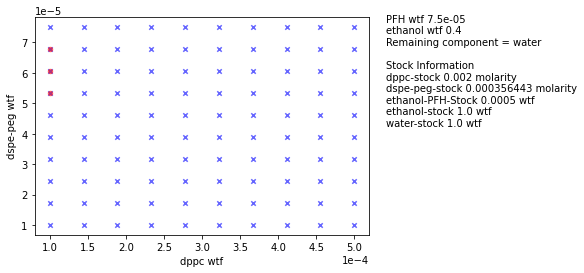

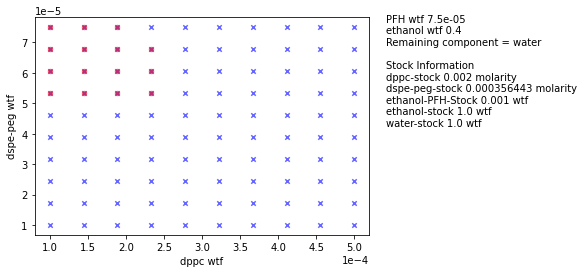

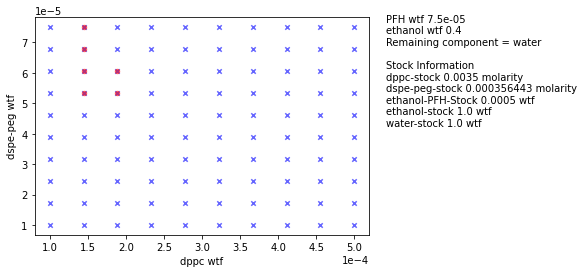

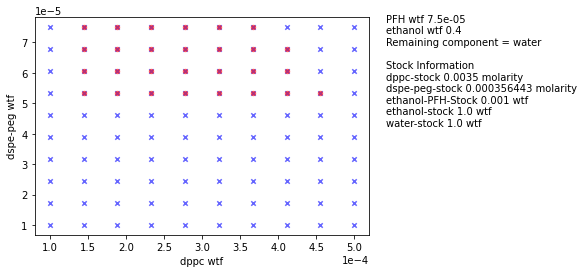

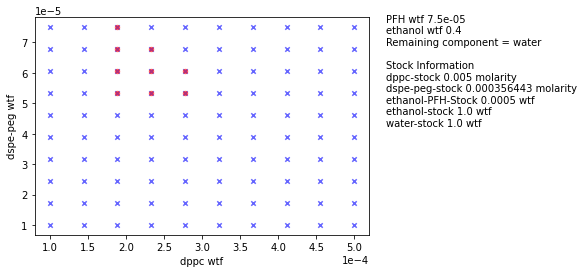

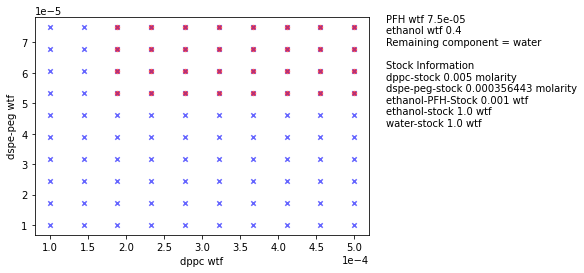

In [23]:
graph_stock_canidates(stock_canidates, experiment_dict, wtf_sample_canidates)

In [30]:
def prepare_stock_search(stock_canidates, experiment_dict, wtf_sample_canidates):
    stock_names = experiment_dict['Stock Names']
    stock_units = experiment_dict['Stock Concentration Units']
    
    
    filtered_wtf_list = []
    stock_text_list = []
    for stock_canidate in stock_canidates:
        volume_canidates = create.calculate_ouzo_volumes(wtf_sample_canidates, experiment_dict, searching=True, searching_stock_concentrations=stock_canidate)
        filtered_wtf_samples, filtered_volume_samples = create.filter_samples(wtf_sample_canidates, volume_canidates, 30, 1000)
        print(filtered_wtf_samples)
        filtered_wtf_list.append(filtered_wtf_samples)
        
        stock_text = ['', 'Stock Information']
        
        for i, stock_name in enumerate(stock_names):
            additional_stock_text = stock_name + ' ' + str(stock_canidate[i]) + ' ' + stock_units[i]
            stock_text.append(additional_stock_text) 
        stock_text_list.append(stock_text)

    return filtered_wtf_list, stock_text

In [31]:
t = prepare_stock_search(stock_canidates, experiment_dict, wtf_sample_canidates)


Min sample volume = 736.6685525253895uL Max sample volume = 736.6804371948689uL
[array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.00000000e-04, 6.05555556e-05, 7.50000000e-05, 4.00000000e-01,
       5.99764444e-01]), array([1.00000000e-04, 6.77777778e-05, 7.50000000e-05, 4.00000000e-01,
       5.99757222e-01])]
Min sample volume = 736.5588478840391uL Max sample volume = 736.680437194869uL
[array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.44444444e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99727222e-01]), array([1.88888889e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99682778e-01]), array([2.33333333e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99638333e-01]), array([1.00000000e-04, 6.05555556e-05, 7.50000000e-05, 4.00000000e-01,
       5.99764444e-01]), array([1.44444444e-04, 6.05555556e-05, 7.50000000e-05, 4.00000000e-01,


Min sample volume = 736.6685525253895uL Max sample volume = 736.6804371948689uL
Min sample volume = 736.5588478840391uL Max sample volume = 736.680437194869uL
Min sample volume = 736.6013584325623uL Max sample volume = 736.6438689810856uL
Min sample volume = 736.3878914846017uL Max sample volume = 736.6438689810856uL
Min sample volume = 736.5282220049955uL Max sample volume = 736.6073007673021uL
Min sample volume = 736.3334962665989uL Max sample volume = 736.6073007673021uL
[[array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.00000000e-04, 6.05555556e-05, 7.50000000e-05, 4.00000000e-01,
       5.99764444e-01]), array([1.00000000e-04, 6.77777778e-05, 7.50000000e-05, 4.00000000e-01,
       5.99757222e-01])], [array([1.00000000e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99771667e-01]), array([1.44444444e-04, 5.33333333e-05, 7.50000000e-05, 4.00000000e-01,
       5.99727222e-01]), array([1.88888889e-04, 5.33333333e-05

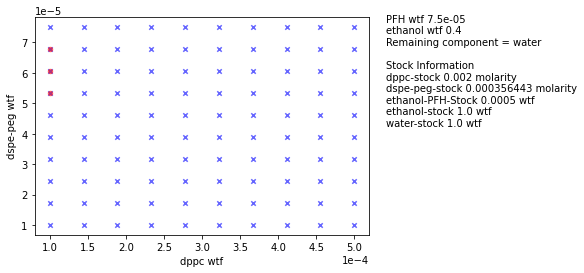

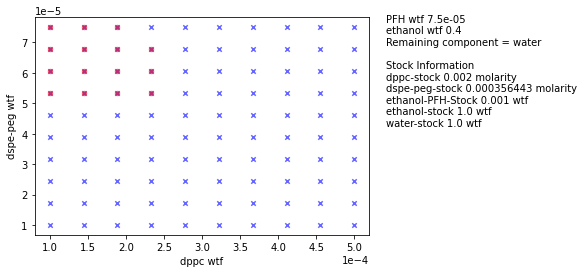

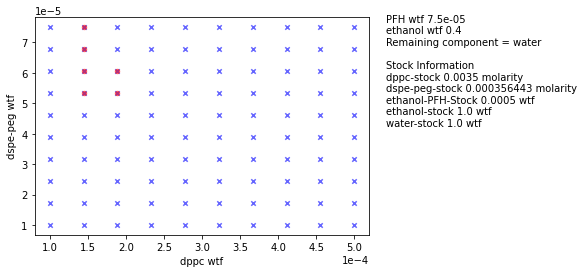

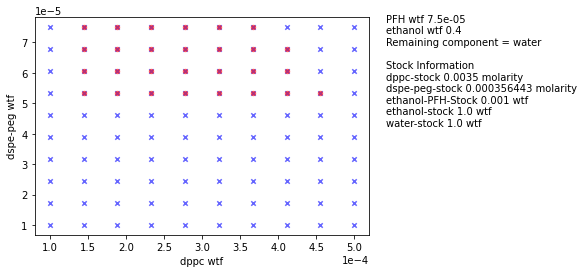

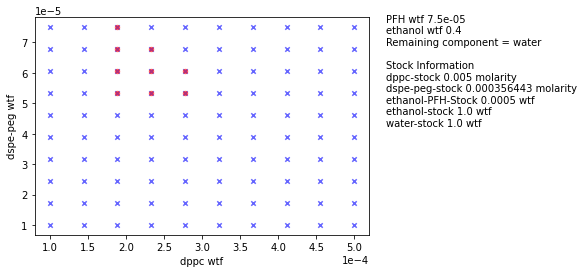

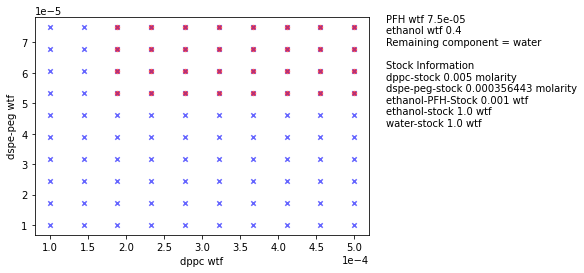

In [ ]:
t = ['34', 'ds']
g = ['274']
f = t.append(g)
print(t)

In [ ]:
import matplotlib.pyplot as plt

def rearrange(sample_volumes):
    """Rearranges sample information to group samples based on position in sublist. [[a1,b1,c1],[a2,b2,c2]] => [[a1,a2],[b1,b2],[c1,c2]]"""
    component_volumes_rearranged = []
    for i in range(len(sample_volumes[0])): 
        component_volumes = []
        for sample in sample_volumes:
            component_volume = sample[i]
            component_volumes.append(component_volume)
        component_volumes_rearranged.append(component_volumes)
    return component_volumes_rearranged 

def graph_canidates(experiment_dict, unfiltered_samples, filtered_samples, xlim = [0,1], ylim = [0,1]):
    wtf_unfiltered_rearranged = rearrange(unfiltered_samples)
    
    filtered_samples_rerranged_list = []
    for filtered_sample_set in filtered_samples:
        filtered_samples_rerranged = rearrange(filtered_sample_set)
        filtered_samples_rerranged_list.append(filtered_samples_rerranged)
        
    marker_size = 20

    component_names = experiment_dict['Component Shorthand Names']
    
    x_index = experiment_dict['Component Graphing X Index']
    x_component_name = component_names[x_index]

    y_index = experiment_dict['Component Graphing Y Index']
    y_component_name = component_names[y_index]
    

    # Plot all canidates
    plt.scatter(wtf_unfiltered_rearranged[x_index], 
                wtf_unfiltered_rearranged[y_index], 
                marker_size, alpha = 0.6, marker = 'x', color = 'b')

    # Plot samples actually made 
    for wtf_filtered_rearranged in filtered_samples_rerranged_list:
#         print(wtf_filtered_rearranged[x_index])
        plt.scatter(wtf_filtered_rearranged[x_index], # could automate by looking at the experiment names
                    wtf_filtered_rearranged[y_index], 
                    marker_size, alpha = 0.5, marker = 'o')


    plt.xlabel(x_component_name + ' wtf')
    plt.ylabel(y_component_name + ' wtf')
    
    completing_component_index = len(component_names) - 1  
    other_indexes = []
    for i in range(len(component_names)):
        if i == x_index or i == y_index or i == completing_component_index:
            pass
        else:
            other_indexes.append(i)
        
    component_units = experiment_dict['Component Concentration Unit']
    component_concentrations = experiment_dict['Component Concentrations [min, max, n]']
    
    text = []
    for index in other_indexes: 
        component_unit = component_units[index]
        component_concentration = component_concentrations[index][0]
        component_name = component_names[index]
        string = component_name + ' ' + component_unit + ' ' + str(component_concentration)
        text.append(string)
    
    text.append('Remaining component = ' + component_names[completing_component_index])
    text_newline = '\n'.join(text) 

    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.annotate(text_newline, xy=(1.05, 0.85), xycoords='axes fraction')        
    plt.autoscale(True)
    plt.show()

In [ ]:
graph_canidates(experiment_dict, wtf_sample_canidates, [filtered_sample_search[0]])